# Problem 5:
The temperature within a wall is measured with several thermometers. Potentially useful Matlab 
Commands: gradient, plot.

Given the temperature data below:

5.  Plot the temperature profile.
6.  k=0.85 W/m-K.  Plot the flux, q, as a function of position. 
7.  Assuming no energy generation, is the wall warming or cooling?

### Plot the Temperature Profile

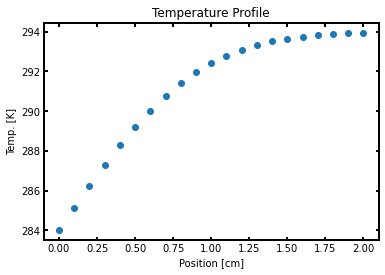

In [2]:
# Plotting the Temperature File
## imported modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## First created a dictionary of the postiion and temperature data
#### Created two arrays to display values
pos_array = np.arange(0,2+.1,.1)
temp_list = [284.00, 285.12, 286.22, 287.28,288.28,289.20,290.03, 290.77,291.42,291.96,292.42,292.80,293.10,293.34,293.52,293.66,293.76,293.83,293.89,293.92,293.95 ]
temp_array = temp_list
#print(pos_array)

dict_values = {
    "Position [cm]":pos_array,
    "Temp. [K]": temp_array
}

## second, converted the created dictionary into a dataframe that can be manipulated
df_pos_temp=pd.DataFrame(dict_values)

## third, taking that dataframe that has been created, extracted values
### extract values
pos = df_pos_temp['Position [cm]']
temp = df_pos_temp['Temp. [K]']

## fourth, plotted values 
### get the axes
ax5 = plt.axes()
### create the scatter plot
ax5.scatter(pos, temp)
##### set the linewidth and the ticks
for axis in ['top','bottom','left','right']:
    ax5.spines[axis].set_linewidth(2)
ax5.tick_params(axis = 'both',direction = 'in', width = 2)
ax5.tick_params(right=True,top=True)
##### Set the titles
ax5.set_title("Temperature Profile")
ax5.set_xlabel("Position [cm]")
ax5.set_ylabel("Temp. [K]")
plt.show()


## Plot the flux q as a function of position
* In order to do this we need to determine the flux using fourier's law...
* So using fourier's law below I think used the constant of  *`k= .85 W/m-K`*

* Equation:
$ \mathrm{q\ =\ -k}\ (∆T/∆x) $

* Created a function that will take an input dataframe, and then calculate the heatflux and put that column onto the dataframe and returned the dataframe
* Then needed to plot the heatflux as a function of position

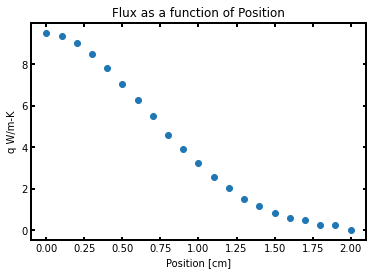

In [5]:
## First defined a function for heat flux from conduction (fourier's law
def cond_flux(dataframe):
    # takes the input dataframe 
    # sets the known variables in the dataframe
    dataframe = df_pos_temp
    k = .85 # W/m-K    pos = dataframe['Position [cm]']
    temp = dataframe['Temp. [K]']
    pos = dataframe['Position [cm]']
    # array for temperature difference
    t_diff = np.empty(len(temp))
    # array for position difference
    p_diff = np.empty(len(pos))
    # new column for q, same length as position
    dataframe['q'] = np.empty(len(pos))
    q_array = dataframe['q']

    # equation for q was developed to generate a new array to be added to the dataframe

    ## in order to do this a for loop was utilized in order to get an array of the difference in temperatures
    # initialized start position
    t_previous= 0
    p_previous = 0
    for t_current in range(0,len(temp)):
        # first index skip
        if t_current >0:
            # took the current temp minus the previous
            t_diff[t_previous] =  temp[t_current]- temp[t_previous]

        # then set the previous temp to teh current temp to be referenced later
        t_previous = t_current
        # equation for q values was constructed with a for loop to append those values to the array for q 
        for p_current in range(0,len(pos)):
            if p_current > 0:
                p_diff[p_previous] = pos[p_current] - pos[p_previous]
                q_array[p_previous] = k*(t_diff[p_previous]/p_diff[p_previous])
            p_previous = p_current
    return q_array
## Second, after defining the function, what I did was 
cond_flux(df_pos_temp)
q_cond = df_pos_temp['q']
pos = df_pos_temp['Position [cm]']

## fourth, plotted values 
### get the axes
ax5 = plt.axes()
### create the scatter plot
ax5.scatter(pos, q_cond)
##### set the linewidth and the ticks
for axis in ['top','bottom','left','right']:
    ax5.spines[axis].set_linewidth(2)
ax5.tick_params(axis = 'both',direction = 'in', width = 2)
ax5.tick_params(right=True,top=True)
##### Set the titles
ax5.set_title("Flux as a function of Position")
ax5.set_xlabel("Position [cm]")
ax5.set_ylabel("q W/m-K")
plt.show()

### Assuming no energy generation, is the wall warming or cooling?